In [281]:
###Importing Modules we will use for data importing and pre-processingl###

import pandas as pd

In [282]:
###Importing Modules we will use for data visualization###

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [283]:
###Importing Modules we will use for machine learning###

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [284]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [285]:
data = X

In [286]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [287]:
data['quality'] = y

C:\Users\aayus\AppData\Local\Temp\ipykernel_19320\3495780745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'quality'] = y


In [288]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [289]:
data.shape

(6497, 12)

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


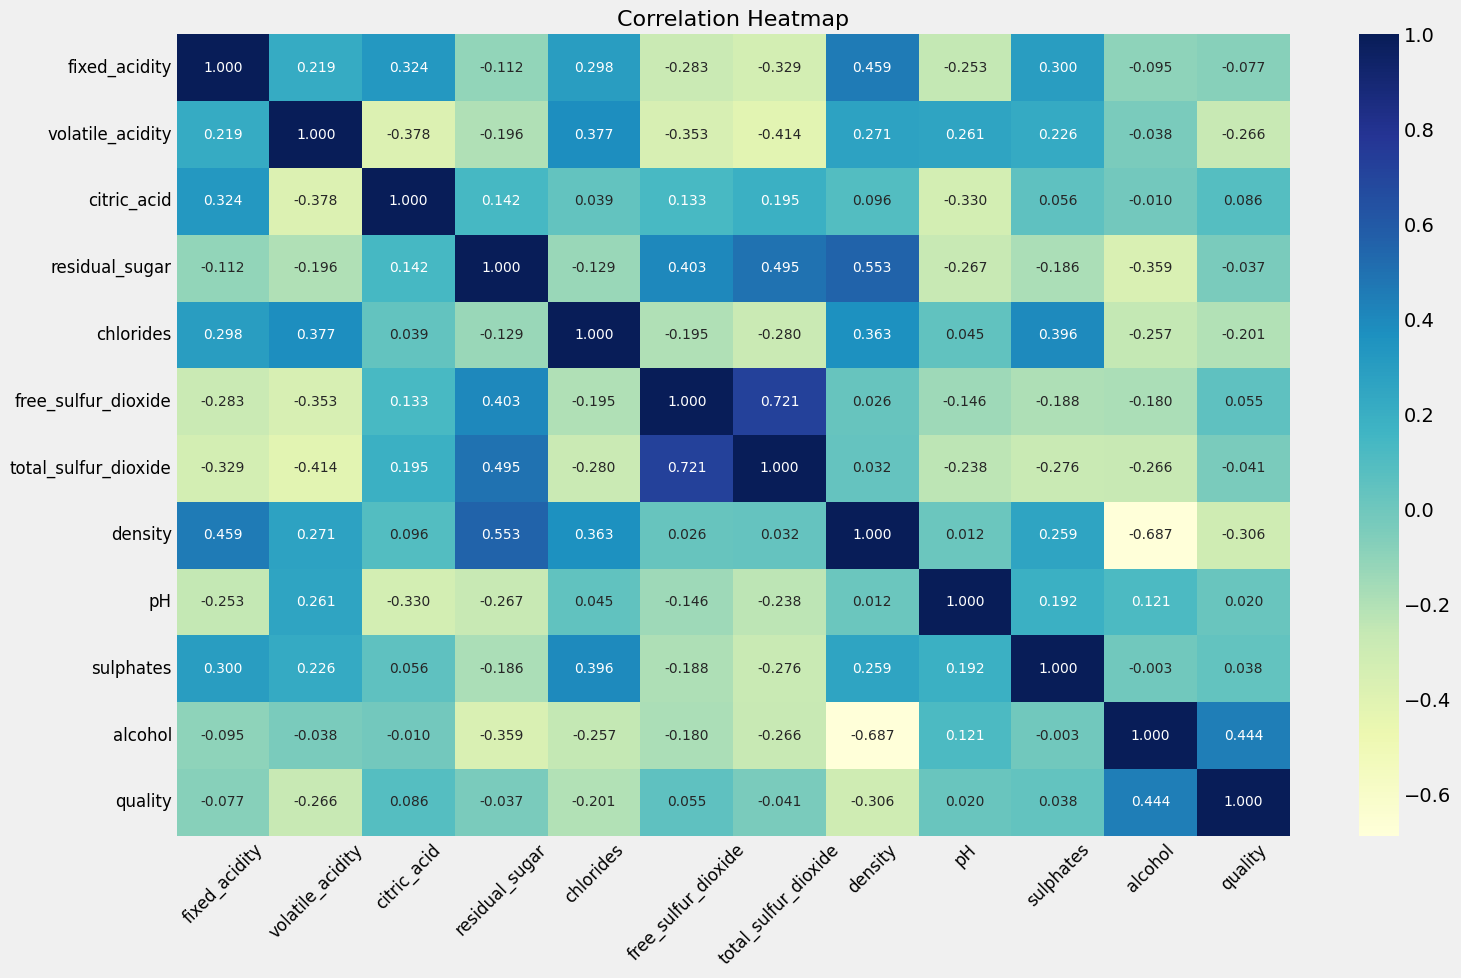

In [291]:
# plotting correlation heatmap 
plt.figure(figsize=(16, 10))  # Adjusting figsize for better clarity
dataplot = sns.heatmap(round(data.corr(), 3), cmap="YlGnBu", annot=True, fmt='.3f', annot_kws={"size": 10})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()  # Ensures elements fit properly
plt.show()

Text(0.5, 1.0, 'Volatile acidity Vs Quality')

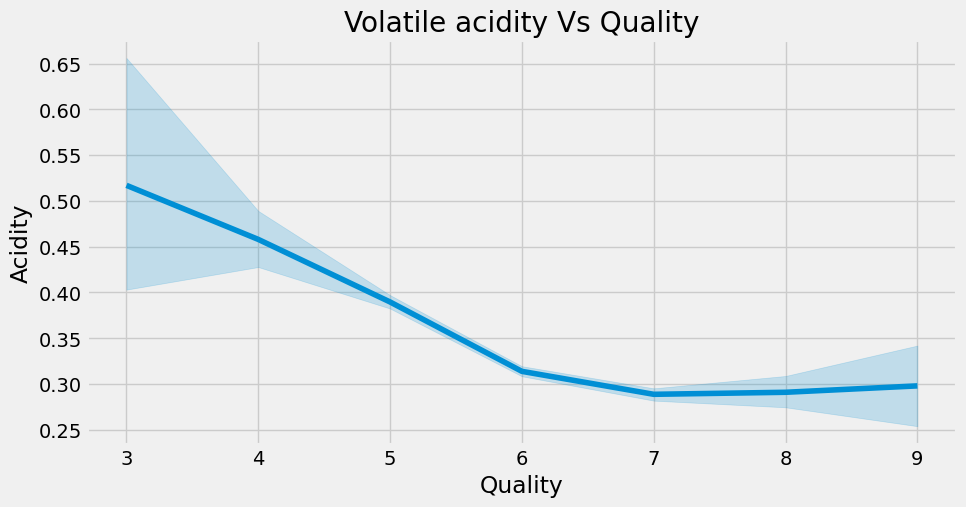

In [292]:
matplotlib.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
sns.lineplot(y='volatile_acidity',x='quality',data=data)
plt.xlabel('Quality')
plt.ylabel('Acidity')
plt.title('Volatile acidity Vs Quality')

Text(0.5, 1.0, 'Chlorides Vs Quality')

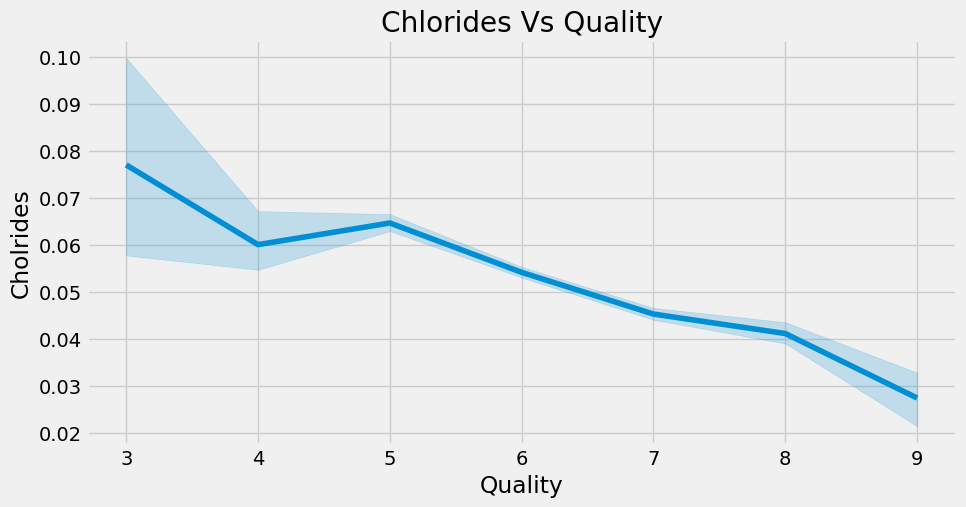

In [293]:
matplotlib.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
sns.lineplot(y='chlorides',x='quality',data=data)
plt.xlabel('Quality')
plt.ylabel('Cholrides')
plt.title('Chlorides Vs Quality')

In [294]:
data_new = data[data['density']>1]
data_new.shape

(147, 12)

As records with density over 1 is only 2.26% data we will drop that

In [295]:
data = data[data['density']<1]
data.shape

(6321, 12)

Text(0.5, 1.0, 'Density Vs Quality')

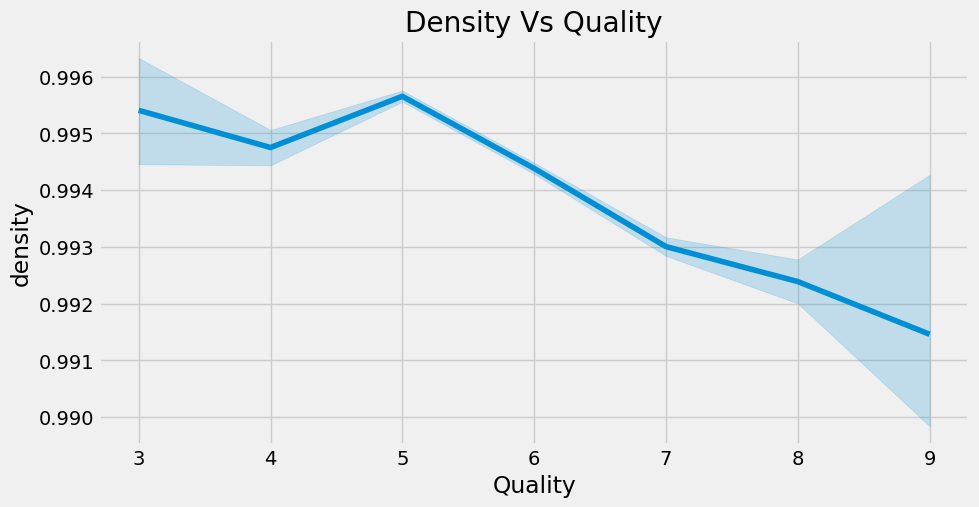

In [296]:
plt.figure(figsize=(10,5))
sns.lineplot(y='density',x='quality',data=data)
plt.xlabel('Quality')
plt.ylabel('density')
plt.title('Density Vs Quality')

Text(0.5, 1.0, 'Alcohol Vs Quality')

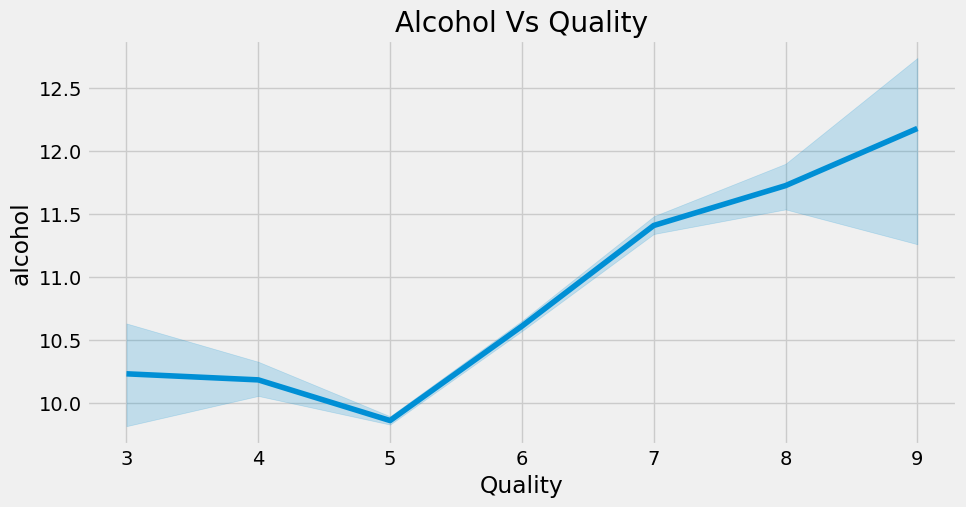

In [297]:
plt.figure(figsize=(10,5))
sns.lineplot(y='alcohol',x='quality',data=data)
plt.xlabel('Quality')
plt.ylabel('alcohol')
plt.title('Alcohol Vs Quality')

In [298]:
ave_qu = data.groupby("quality").mean()
ave_qu

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.692857,0.513571,0.265000,4.873214,0.077857,40.392857,115.982143,0.995408,3.265714,0.499643,10.230357
4,7.268075,0.454624,0.272958,4.108451,0.059681,20.603286,103.368545,0.994752,3.228779,0.503662,10.182160
5,7.255669,0.390129,0.302822,5.539075,0.064335,30.144526,120.486131,0.995655,3.214740,0.524307,9.858968
6,7.115896,0.312254,0.320766,5.395069,0.053710,31.139812,115.403902,0.994385,3.218750,0.529595,10.609104
7,7.068409,0.288089,0.331846,4.662194,0.044907,30.466573,108.634652,0.993005,3.229444,0.544887,11.409040
8,6.816842,0.292868,0.330737,5.253158,0.040995,34.410526,117.094737,0.992389,3.222526,0.508684,11.725789
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [299]:
#Defined X value and y value , and split the data train

X = data[["volatile_acidity", "density", "alcohol"]]           
Y = data["quality"]    

In [300]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


In [301]:
# using the model Logistic Regression

Lo_model=LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.9, fit_intercept = True, C = 10)
Lo_model.fit(X_train,y_train)
y_pred_Lo=Lo_model.predict(X_test)
accuracy_score_lo = round(accuracy_score(y_test,y_pred_Lo)*100,2)

print(f" Model Evaluation Logistic R : accuracy score : {accuracy_score_lo}%")

 Model Evaluation Logistic R : accuracy score : 52.12%


c:\Users\aayus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [302]:
# using the model Decision Tree Classifier
Tree_model=DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 1, max_depth= 50, criterion= 'entropy')

Tree_model.fit(X_train,y_train)
y_pred_T =Tree_model.predict(X_test)
accuracy_score_T = round(accuracy_score(y_test,y_pred_T)*100,2)

print(f" Model Evaluation Decision Tree : accuracy score : {accuracy_score_T}%")

 Model Evaluation Decision Tree : accuracy score : 58.32%


In [303]:
# using the model SVC
svc_model=SVC(C=50,kernel="rbf")
svc_model.fit(X_train,y_train)
y_pred_svc =svc_model.predict(X_test)
accuracy_score_svc = round(accuracy_score(y_test,y_pred_svc)*100,2)

print(f" Model Evaluation Decision Tree : accuracy score : {accuracy_score_svc}%")

 Model Evaluation Decision Tree : accuracy score : 50.73%


In [304]:
# using the model SVR

svr_model=SVR(degree=1,coef0=1, tol=0.001, C=1.5,epsilon=0.001)
svr_model.fit(X_train,y_train)
y_pred_svr =svc_model.predict(X_test)
accuracy_score_svr = round(accuracy_score(y_test,y_pred_svr)*100,2)

print(f" Model Evaluation Decision Tree : accuracy score :{accuracy_score_svr}%")

 Model Evaluation Decision Tree : accuracy score :50.73%


In [305]:
# using the model K Neighbors Classifier

K_model = KNeighborsClassifier(weights = 'distance', n_neighbors = 3, metric = 'manhattan')
K_model.fit(X_train, y_train)
y_pred_k = K_model.predict(X_test)
accuracy_score_k = round(accuracy_score(y_test,y_pred_k)*100,2)

print(f" Model Evaluation K Neighbors Classifier : accuracy score :{accuracy_score_k}%")

 Model Evaluation K Neighbors Classifier : accuracy score :58.95%
